In [1]:
# import pandas, numpy, netwokrx, basemap and matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.basemap import Basemap

In [2]:
# Read xlsx file and convert columns to DataFrame
db = pd.ExcelFile('airports.xlsx')
intl_apt = pd.read_excel(db, 'intl_apt')
intl_flt = pd.read_excel(db, 'intl_flt')
us_apt = pd.read_excel(db, 'us_apt')

In [3]:
# select the data of 2018
intl_flt1 = intl_flt[intl_flt['Year']==2018]
intl_flt1

passengers  Year  Month airport_1 airport_2  scheduled
612234       43629  2018      1       ABI       QRO         71
612235       43628  2018      1       ABQ       GUA          0
612236       43627  2018      1       ACY       YYZ          0
612237       43626  2018      1       ADS       ANU          0
612238       43625  2018      1       AEX       BOG          0
...            ...   ...    ...       ...       ...        ...
643001       36161  2018     12       ZZZ       MHH          0
643002       36160  2018     12       ZZZ       NAS          0
643003       36159  2018     12       ZZZ       SAQ          0
643004       36158  2018     12       ZZZ       YYJ          0
643005       36157  2018     12       ZZZ       ZNA          0

[30772 rows x 6 columns]

In [4]:
# Ensure the origin and destination airports of each airline exist and at least one of them is in the US
intl_flt2 = intl_flt1[(intl_flt1['airport_1'].isin(intl_apt['IATA'])) & (intl_flt1['airport_2'].isin(intl_apt['IATA'])) & ((intl_flt1['airport_1'].isin(us_apt['IATA'])) | (intl_flt1['airport_2'].isin(us_apt['IATA'])))]
intl_flt2

passengers  Year  Month airport_1 airport_2  scheduled
612234       43629  2018      1       ABI       QRO         71
612235       43628  2018      1       ABQ       GUA          0
612236       43627  2018      1       ACY       YYZ          0
612237       43626  2018      1       ADS       ANU          0
612238       43625  2018      1       AEX       BOG          0
...            ...   ...    ...       ...       ...        ...
642994       36168  2018     12       VNY       NRT          0
642995       36167  2018     12       VNY       SXM          0
642996       36166  2018     12       VNY       YVR          0
642997       36165  2018     12       VRB       MHH          0
642998       36164  2018     12       YIP       YYZ          0

[29228 rows x 6 columns]

In [5]:
airport1 = pd.DataFrame(intl_flt2.airport_1.value_counts().reset_index(name='counts'))
airport1

index  counts
0     JFK    2343
1     MIA    2210
2     LAX    2154
3     EWR    1498
4     ORD    1382
..    ...     ...
295   MKG       1
296   STS       1
297   RME       1
298   AVL       1
299   GRK       1

[300 rows x 2 columns]

In [6]:
airport2 = pd.DataFrame(intl_flt2.airport_2.value_counts().reset_index(name='counts'))
airport2

index  counts
0     YYZ    2119
1     CUN    1074
2     YUL     893
3     YVR     874
4     MEX     816
..    ...     ...
496   FMO       1
497   YQY       1
498   BRI       1
499   DIJ       1
500   LDU       1

[501 rows x 2 columns]

In [7]:
count = airport1.append(airport2).groupby('index').sum()
count

counts
index        
AAO         1
ABE         9
ABI        10
ABQ        11
ABV         1
...       ...
ZCL        53
ZIH        68
ZLO        25
ZRH       254
ZSA        12

[801 rows x 1 columns]

In [8]:
counts = pd.DataFrame({'IATA': count.index, 'total': count.counts})
counts

IATA  total
index            
AAO    AAO      1
ABE    ABE      9
ABI    ABI     10
ABQ    ABQ     11
ABV    ABV      1
...    ...    ...
ZCL    ZCL     53
ZIH    ZIH     68
ZLO    ZLO     25
ZRH    ZRH    254
ZSA    ZSA     12

[801 rows x 2 columns]

In [9]:
cor = counts.merge(intl_apt, on = 'IATA')
cor

IATA  total   Latitude   Longitude
0    AAO      1   9.430225  -64.470726
1    ABE      9  40.652100  -75.440804
2    ABI     10  32.411301  -99.681900
3    ABQ     11  35.040199 -106.609001
4    ABV      1   9.006790    7.263170
..   ...    ...        ...         ...
796  ZCL     53  22.897100 -102.686996
797  ZIH     68  17.601601 -101.460999
798  ZLO     25  19.144800 -104.558998
799  ZRH    254  47.464699    8.549170
800  ZSA     12  24.063299  -74.524002

[801 rows x 4 columns]

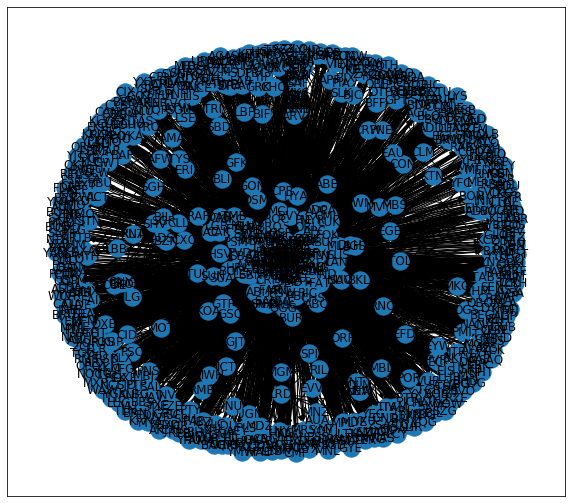

In [10]:
# Generate network with networkX
g1 = nx.from_pandas_edgelist(intl_flt2, source = 'airport_1', target = 'airport_2' ,create_using = nx.DiGraph())
plt.figure(figsize = (10,9))
nx.draw_networkx(g1)
plt.show()

C:\Users\11811\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\11811\anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\11811\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


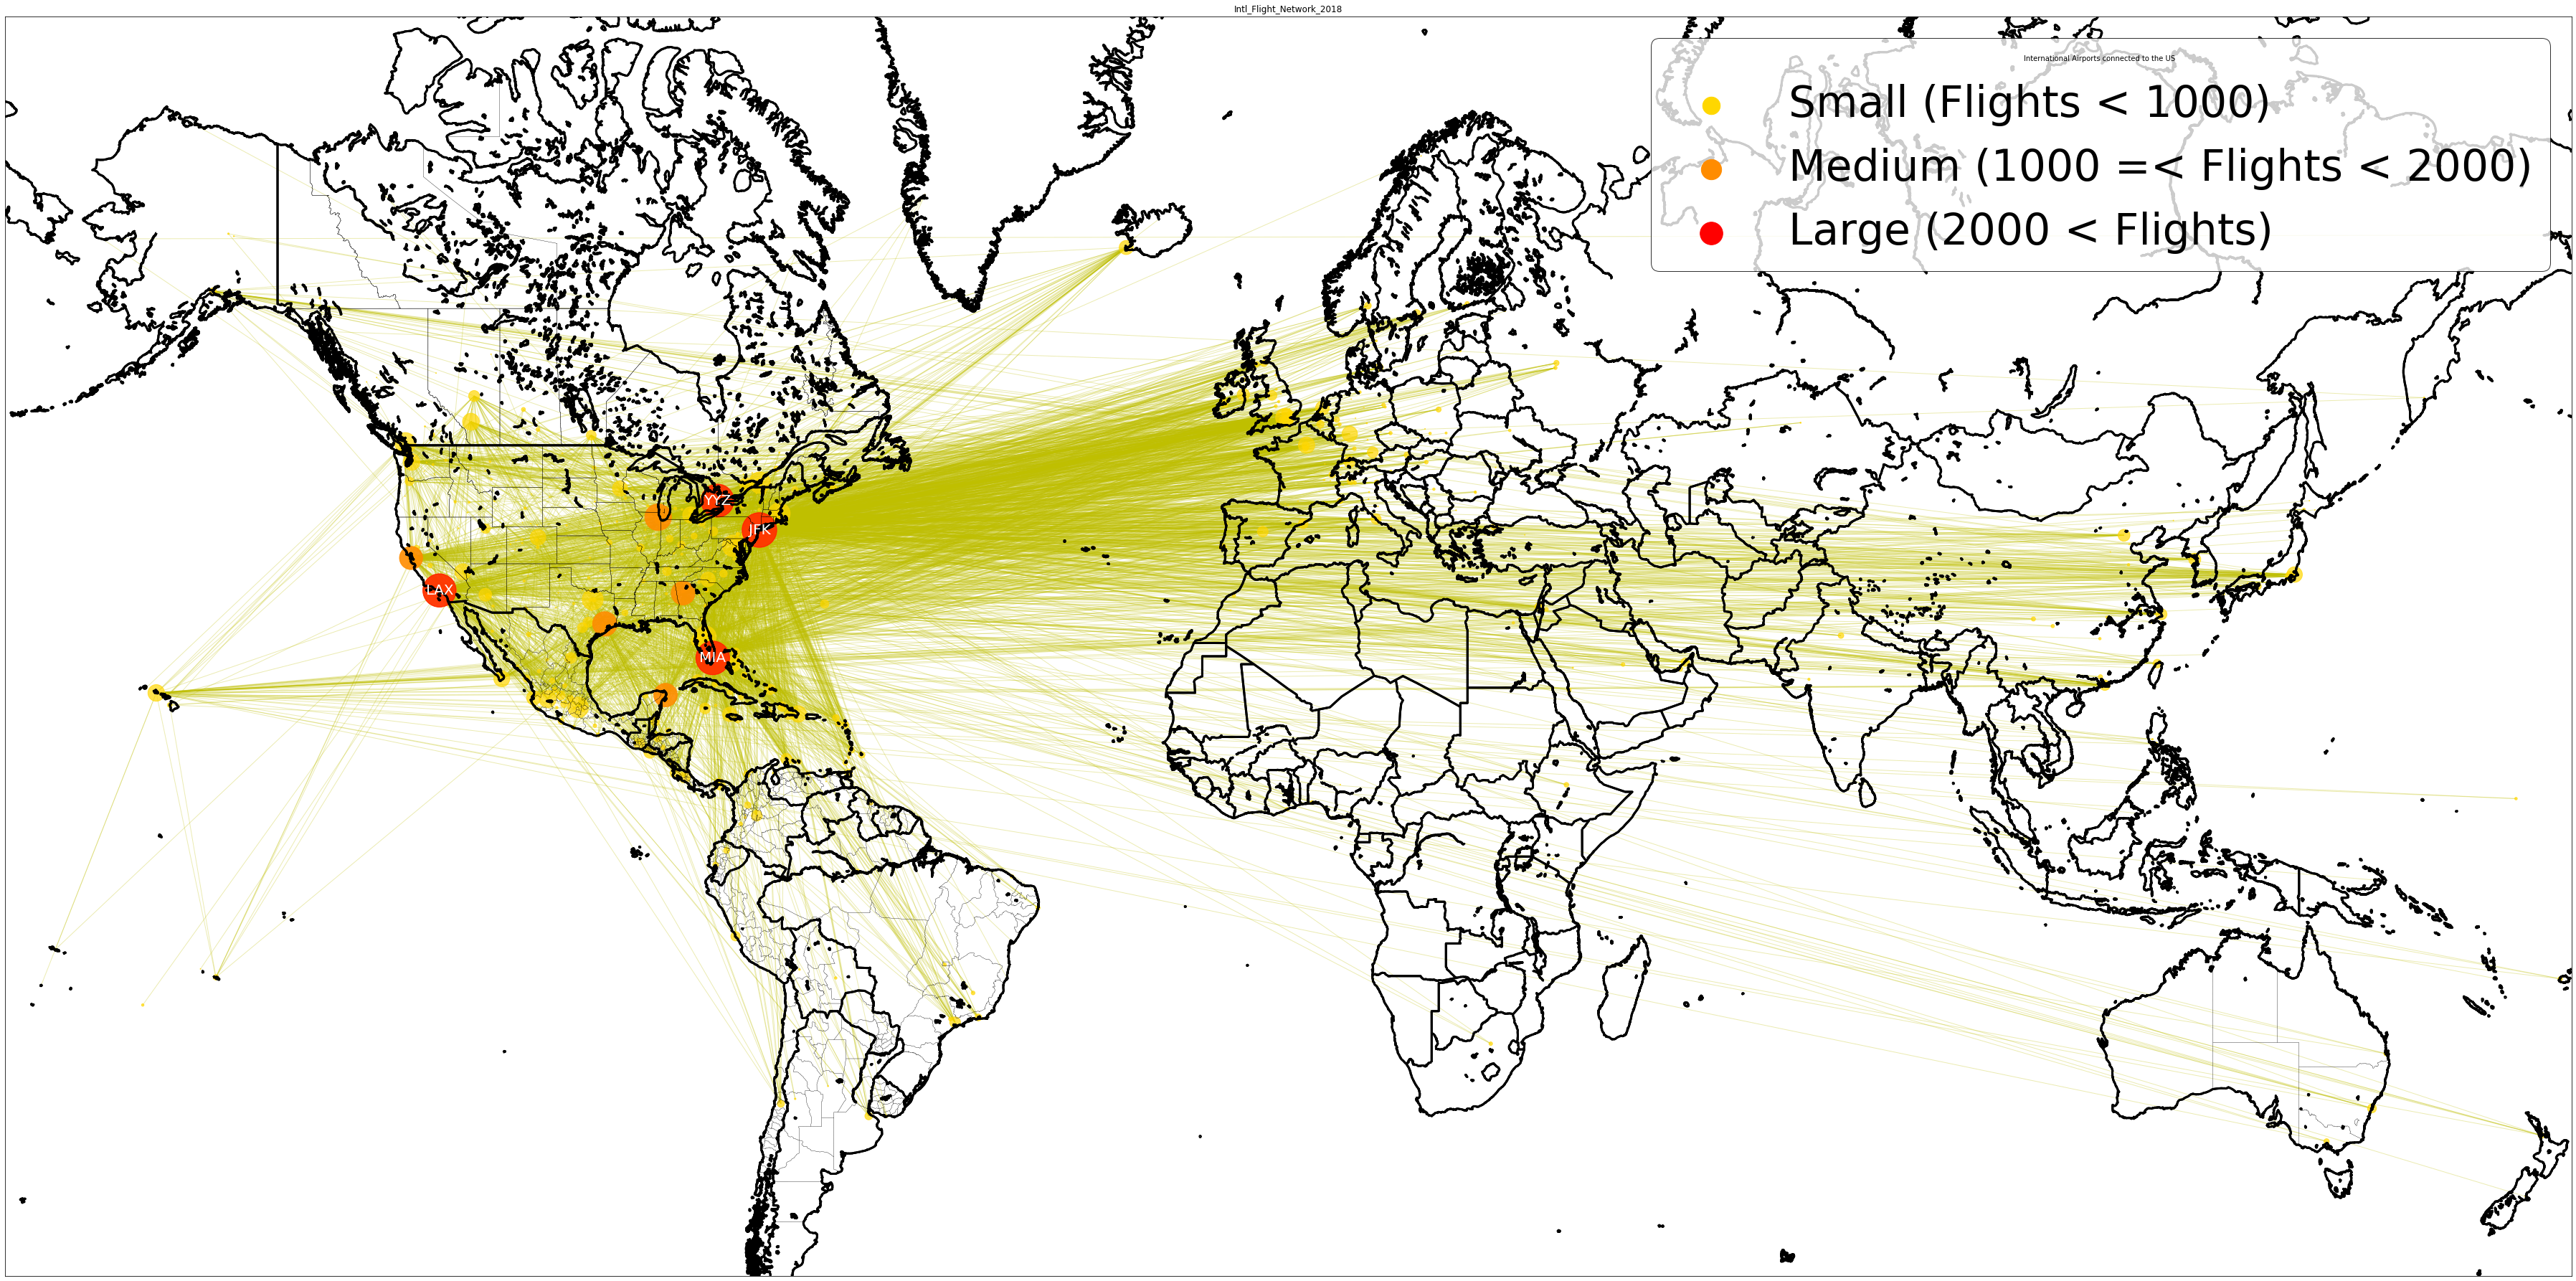

In [11]:
# Put the network on Basemap
# Create figure
plt.figure(figsize=(50,60))
# Set scale, resolution of map
m1 = Basemap(projection='merc',llcrnrlat=-51,urcrnrlat=75,
            llcrnrlon=-179,urcrnrlon=179,lat_ts=0,resolution='i',suppress_ticks=True)

# Extract coordinates from cor_data and create cor with a for loop
long, lat = m1(cor['Longitude'].values, cor['Latitude'].values)
coor = {}
for count, elem in enumerate (cor['IATA']):
    coor [elem] = (long[count], lat[count])

# draw nodes and edges    
nx.draw_networkx_edges(G = g1, pos = coor, edge_color = 'y', alpha=0.3,arrows = False)
nx.draw_networkx_nodes(G = g1, pos = coor, nodelist = [i for i in g1.nodes() if counts['total'][i] < 1000], node_color = 'gold', alpha = 0.7, node_size = [counts['total'][i] for i in g1.nodes() if counts['total'][i] < 1000])
nx.draw_networkx_nodes(G = g1, pos = coor, nodelist = [i for i in g1.nodes() if counts['total'][i] > 1000], node_color = 'darkorange', alpha = 0.9, node_size = [counts['total'][i] for i in g1.nodes() if counts['total'][i] > 1000 ])
nx.draw_networkx_nodes(G = g1, pos = coor, nodelist = [i for i in g1.nodes() if counts['total'][i] > 2000], node_color = 'red', alpha = 0.6, node_size = [counts['total'][i] for i in g1.nodes() if counts['total'][i] > 2000])


nx.draw_networkx_labels(G = g1, pos = coor, font_size=20, font_color="white",
		                        labels = {i:i  for i in g1.nodes() if counts['total'][i] >= 2000})
# draw countries
m1.drawcountries(linewidth = 3)

# draw states
m1.drawstates(linewidth = 0.2)

# draw coastlines
m1.drawcoastlines(linewidth=3)

s = plt.scatter([],[], s=600, c='gold', marker = "o")
m = plt.scatter([],[], s=800, c='darkorange', marker = "o")
l = plt.scatter([],[], s=1000, c='red', marker = "o")
labels = ["Small (Flights < 1000)", "Medium (1000 =< Flights < 2000)", "Large (2000 < Flights)"]
plt.legend([s,m,l], labels, loc = 0, fontsize = 60, frameon = True, edgecolor = "black", title = "International Airports connected to the US ")


# draw countries
m1.drawcountries(linewidth = 3)

# draw states
m1.drawstates(linewidth = 0.2)

# draw coastlines
m1.drawcoastlines(linewidth=3)

# automatically adjust
plt.tight_layout()

# plot title
plt.title("Intl_Flight_Network_2018")

# save plot
plt.savefig("./images/Intl_Net_2018.png", format = "png", dpi = 500)
plt.show()